#### Problem 9.1 (Page 38)

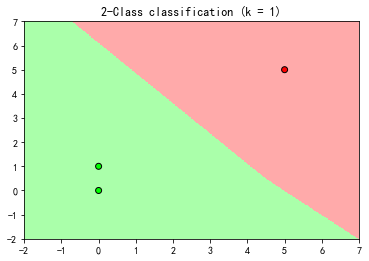

In [2]:
import numpy as np
import helper as hlp

X = np.array([[0, 0], [0, 1], [5, 5]]).astype("float")
y = np.array([1, 1, -1])
#(a)
knn = hlp.KNeighborsClassifier_(1)
knn.fit(X, y)
hlp.draw(X, y, knn)

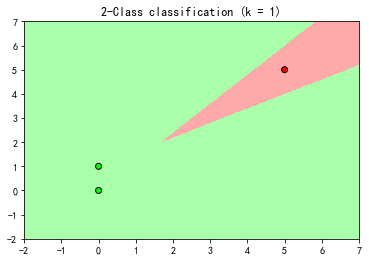

In [3]:
#(b)
scaler = hlp.StandardScaler_()
X1 = scaler.fit_transform(X)
knn = hlp.KNeighborsClassifier_(1)
knn.fit(X1, y)

hlp.draw(X, y, knn, flag=2, preprocess=scaler)

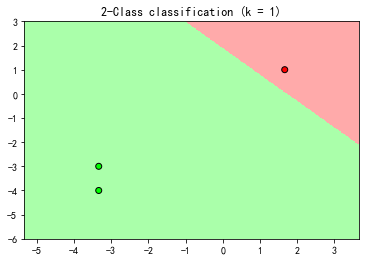

In [4]:
#(c)
pca = hlp.PCA_(1)
pca.fit(X)
X2 = pca.transform(X)
knn = hlp.KNeighborsClassifier_(1)
knn.fit(X2, y)

hlp.draw(X, y, knn, flag=3, preprocess=pca)

#### Problem 9.6 (Page 39)

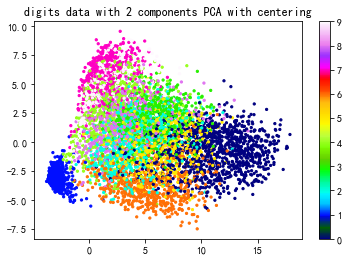

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

data = np.genfromtxt("zip.train")
X = data[:, 1:]
y = data[:, 0]
#PCA分解with centering
pca = hlp.PCA_(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, c=y, cmap='gist_ncar')
plt.colorbar()
plt.title("digits data with 2 components PCA with centering")
plt.show()

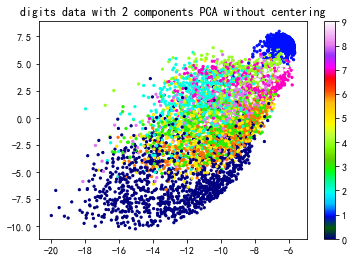

In [6]:
#PCA分解without centering
pca = hlp.PCA_(n_components=2)
X_pca = pca.fit_transform(X, flag=2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5, c=y, cmap='gist_ncar')
plt.colorbar()
plt.title("digits data with 2 components PCA without centering")
plt.show()

#### Problem 9.8 (Page 39)

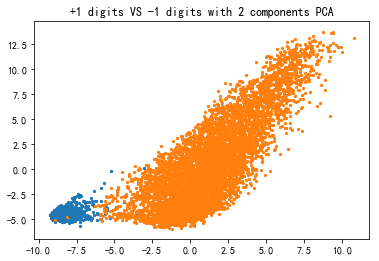

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

data = np.genfromtxt("zip.train")
X = data[:, 1:]
#中心化
X -= np.mean(X, axis=0)
y = data[:, 0]
#选择的标签
l = 1
#划分数据
Xpos = X[y == l]
Xneg = X[y != l]
#对每一类分别使用PCA，flag=2表示pca中不使用中心化
pca = hlp.PCA_(n_components=1)
pca.fit(Xpos, flag=2)
z1 = pca.transform(X)

pca = hlp.PCA_(n_components=1)
pca.fit(Xneg, flag=2)
z2 = pca.transform(X)

#作图
plt.scatter(z1[y == l], z2[y == l], s=5)
plt.scatter(z1[y != l], z2[y != l], s=5)
plt.title("+1 digits VS -1 digits with 2 components PCA")
plt.show()

#### Problem 9.10 (Page 40)

E1 = 2.9848477689390487
E2 = 3.3734459718878087
E_out = 0.2671906269590378


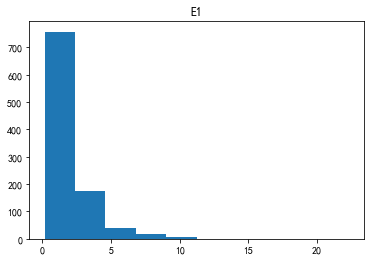

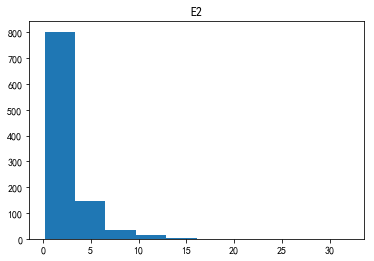

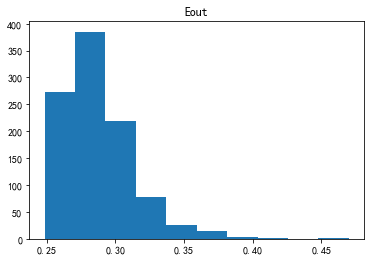

E1_mean = 1.865415167353018
E2_mean = 2.3127315449440284
E_out_mean = 0.2877558958424026


In [8]:
#### (b)
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import helper as hlp

#### (i)
N = 40
d = 5
k = 3

def data(N, d):
    """
    生成数据集
    """
    X = np.random.randn(N, d)
    w = np.random.randn(d)
    epsilon = np.random.randn(N) * 0.5
    y = X.dot(w) + epsilon
    return w, X, y

#### (ii)
#Algorithm 1
def Algorithm_1(X, y, k):
    pca = hlp.PCA_(n_components=k)
    pca.fit(X)
    Z = pca.fit_transform(X)
    e1 = []
    N, d = X.shape
    for i in range(N):
        #每轮选择的数据下标
        index = np.array([True] * N)
        index[i] = False
        #划分数据
        Z0 = Z[i]
        y0 = y[i]
        Z1 = Z[index]
        y1 = y[index]
        w = inv(Z1.T.dot(Z1)).dot(Z1.T).dot(y1)
        e1.append((Z0.dot(w) - y0) ** 2)
    return np.mean(e1)

#Algorithm 2
def Algorithm_2(X, y, k):  
    e2 = []
    
    N, d = X.shape
    for i in range(N):
         #每轮选择的数据下标
        index = np.array([True] * N)
        index[i] = False
        #划分数据
        X0 = X[i].reshape(1, -1)
        y0 = y[i]
        X1 = X[index]
        y1 = y[index]
        #训练
        pca = hlp.PCA_(n_components=k)
        pca.fit(X1)
        Z1 = pca.transform(X1)
        w = inv(Z1.T.dot(Z1)).dot(Z1.T).dot(y1)
        
        Z0 = pca.transform(X0)
    
        e2.append((Z0.dot(w) - y0) ** 2)
    return np.mean(e2)

#### (iii)
def E_out(X, y, w):
    #计算结果
    w0 = inv(X.T.dot(X)).dot(X.T).dot(y)
    #生成新的数据来模拟Eout
    d = X.shape[1]
    N = 10000
    X1 = np.random.randn(N, d)
    epsilon = np.random.randn(N) * 0.5
    y1 = X1.dot(w) + epsilon
    y0 = X1.dot(w0)
    return np.mean((y1 - y0) ** 2)

#### (iv)
w, X, y = data(N, d)
print("E1 =", Algorithm_1(X, y, k))
print("E2 =", Algorithm_2(X, y, k))
print("E_out =", E_out(X, y, w))


#### (v)
M = 1000
E1 = []
E2 = []
Eout = []
for i in range(M):
    w, X, y = data(N, d)
    E1.append(Algorithm_1(X, y, k))
    E2.append(Algorithm_2(X, y, k))
    Eout.append(E_out(X, y, w))
    
plt.hist(E1)
plt.title("E1")
plt.show()
plt.hist(E2)
plt.title("E2")
plt.show()
plt.hist(Eout)
plt.title("Eout")
plt.show()
print("E1_mean =", np.mean(E1))
print("E2_mean =", np.mean(E2))
print("E_out_mean =", np.mean(Eout))

#### Problem 9.14 (Page 42)

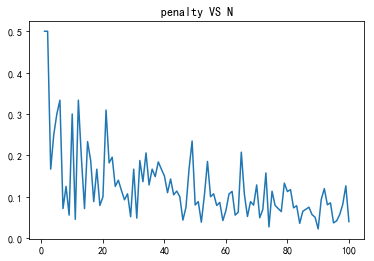

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#(a)
def f(N):
    #生成数据
#    N = 40
    X = np.random.randn(N)
    r = np.sign(np.random.rand(N) - 0.5)
    
    #寻找阈值
    X1 = np.sort(X)
    X2 = (X1[1:] + X1[:-1]) / 2
    X2 = np.append(X1[0] - 1, X2)
    X2 = np.append(X2, X1[-1] + 1)
    
    #计算结果，向量化计算
    temp = np.sign(X1.reshape(-1, 1) - X2)
    result = np.mean(temp != r.reshape(-1, 1), axis=0)
    error = np.min(result)
    
    return 1 / 2 - error

N = np.arange(1, 101)
Error = []
for n in N:
    Error.append(f(n))
plt.plot(N, Error)
plt.title("penalty VS N")
plt.show()

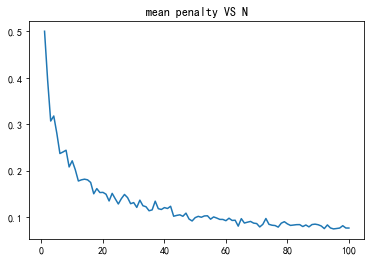

In [11]:
#(b)
m = 100
Error = []
for n in N:
    error = []
    for _ in range(m):
        error.append(f(n))
    Error.append(np.mean(error))
plt.plot(N, Error)
plt.title("mean penalty VS N")
plt.show()

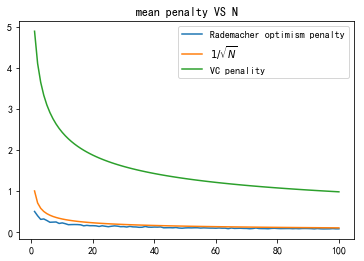

In [13]:
#(c)
N1 = 1 / np.sqrt(N)
N2 = np.sqrt(8 * np.log((4 * ((2 * N) ** 2 + 1))) / N)
plt.plot(N, Error, label="Rademacher optimism penalty")
plt.plot(N, N1, label="$1/\sqrt{N}$")
plt.plot(N, N2, label="VC penality")
plt.title("mean penalty VS N")
plt.legend()
plt.show()

#### Problem 9.22 (Page 47)

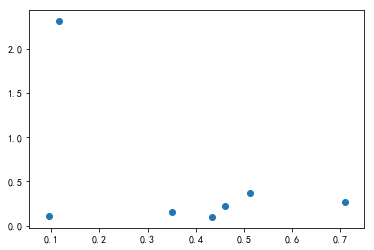

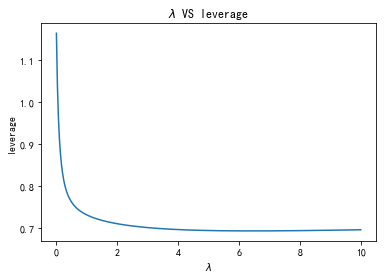

In [15]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

X = np.array([[1, 0.51291],
     [1, 0.46048],
     [1, 0.3504],
     [1, 0.095046],
     [1, 0.43367],
     [1, 0.70924],
     [1, 0.11597]])
y = np.array([0.36542, 0.22156,
     0.15263, 0.10355,
     0.10015, 0.26713,
     2.3095])

def l(X, y, Lambda):
    N, d = X.shape
    #计算
    w = inv(X.T.dot(X) + Lambda * np.eye(d)).dot(X.T).dot(y)
    H = X.dot(inv(X.T.dot(X) + Lambda * np.eye(d))).dot(X.T)
    y_hat = X.dot(w)
    
    N = X.shape[0]
    H1 = np.diag(H)
    Ecv = np.mean(((y - y_hat) / (1 - H1)) ** 2)
    
    #最后一个点
    m = N - 1
    #分子
    e1 = y_hat - y + (y_hat[m] - y[m]) / (1 - H[m][m]) * H[m, :]
    #分母
    e2 = 1 - H1 - H[m, :] ** 2 / (1 - H[m][m])
    Ecv_m = 1 / (N - 1) * np.sum((e1 / e2) ** 2) - \
            1 / (N - 1) * ((y_hat[m] - y[m]) / (1 - 2 * H[m][m])) ** 2
    return Ecv - Ecv_m

Lambda = np.linspace(0, 10, num=300)
leverage = []
for i in Lambda:
    leverage.append(l(X, y, i))

plt.scatter(X[:, 1], y)
plt.show()

plt.plot(Lambda, leverage)
plt.xlabel("$\lambda$")
plt.ylabel("leverage")
plt.title("$\lambda$ VS leverage")
plt.show()

#### Problem 9.23 (Page 48)

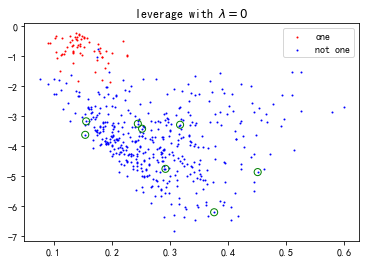

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

data = np.genfromtxt("features.train")
#预处理数据
N = 500
X = data[:, 1:][:N]
y = data[:, 0][:N]
y = (y == 1).astype("double")

def l(X, y, Lambda):
    N, d = X.shape
    #计算
    w = inv(X.T.dot(X) + Lambda * np.eye(d)).dot(X.T).dot(y)
    H = X.dot(inv(X.T.dot(X) + Lambda * np.eye(d))).dot(X.T)
    y_hat = X.dot(w)
    
    N = X.shape[0]
    H1 = np.diag(H)
    Ecv = np.mean(((y - y_hat) / (1 - H1)) ** 2)
    Ecvm = np.array([])
    
    for m in range(N):
        #分子
        e1 = y_hat - y + (y_hat[m] - y[m]) / (1 - H[m][m]) * H[m, :]
        #分母
        e2 = 1 - H1 - H[m, :] ** 2 / (1 - H[m][m])
        Ecv_m = 1 / (N - 1) * np.sum((e1 / e2) ** 2) - \
                1 / (N - 1) * ((y_hat[m] - y[m]) / (1 - 2 * H[m][m])) ** 2
        Ecvm = np.append(Ecvm, Ecv_m)
    return Ecv - Ecvm

Lambda = 0
#计算影响
leverage = l(X, y, Lambda)
#找到影响最大的10个点
label = leverage.argsort() > N - 9
#作图
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=1, c="r", label="one")
plt.scatter(X[y!=1][:, 0], X[y!=1][:, 1], s=1, c="b", label="not one")
plt.scatter(X[:, 0][label], X[:, 1][label], color='', marker='o', edgecolors='g', s=50)
plt.title("leverage with $\lambda={}$".format(Lambda))
plt.legend()
plt.show()